# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 1384 Камынин Александр Александрович и Кондратенко Константин Евгеньевич. Вариант №8.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования. 

## Основные теоретические положения

1. Дискретный прямоугольный импульс:  $$ s_1(k) = \begin{cases} U, \quad n_0 \le k \le n_0 + n_{imp} - 1 \\ 0, \quad else \end{cases} $$

    где U - амплитуда импульса, $ n_0 $ - начальный момент импульса, $ n_{imp} $ - длина импульса.

2. Дискретный гармонический сигнал с экспоненциальной огибающей $ |a|^k $: $$ s(k) = C \cos( \hat{w_0} k ) \cdot |a|^k $$ 

    где a - основание экспоненты, C - амплитуда гармонического сигнала, $ \hat{w_0} $ - частота гармонического сигнала.

3. Энергия сигнала: $$ E = \int_{0}^{T} s^2(t) dt $$

    Здесь T - период сигнала. Для дискретного случая формула примет следующий вид: $$E = \sum_{k=0}^{T} s^2(k)$$

4. Средняя мощность сигнала: $$ P_{ср} = \frac{1}{T} \int_{0}^{T} s^2(t) dt $$

    Здесь T - период сигнала. Для дискретного случая формула примет следующий вид: $$E = \frac{1}{T} \sum_{k=0}^{T} s^2(k)$$

5. Среднее значение сигнала: $$ \overline{s} = \frac{1}{T} \sum_{k=0}^{T} s(k) $$

    Здесь T - период сигнала.

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинаций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами. 

## Выполнение работы

In [29]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import math

In [30]:
'''
Константы
'''
N_br = 8
N = 30 + N_br % 5
a = (-1)**N_br * (0.8 + 0.005 * (N_br % 20))
C = 1 + N_br % 5
omega_hat_0 = np.pi / (6 + N_br % 5)
U = N_br % 20 + 1

n_0 = 3 + N_br % 5
n_imp = 5 + N_br % 5

B_1 = 1.5 + N_br % 5
B_2 = 5.7 - N_br % 5
B_3 = 2.2 + N_br % 5

omega_hat_1 = np.pi / (4 + N_br % 5)
omega_hat_2 = np.pi / (8 + N_br % 5)
omega_hat_3 = np.pi / (16 + N_br % 5)

a1 = 1.5 - N_br % 5
a2 = 0.7 + N_br % 5
a3 = 1.4 + N_br % 5


print(f'N_br = {N_br}')
print(f'N = {N}')
print(f'a = {a}')
print(f'C = {C}')
print(f'omega_hat_0 = {omega_hat_0}')
print(f'U = {U}')
print(f'n_0 = {n_0}')
print(f'n_imp = {n_imp}')
print(f'B_1 = {B_1}')
print(f'B_2 = {B_2}')
print(f'B_3 = {B_3}')
print(f'omega_hat_1 = {omega_hat_1}')
print(f'omega_hat_2 = {omega_hat_2}')
print(f'omega_hat_3 = {omega_hat_3}')
print(f'a1 = {a1}')
print(f'a2 = {a2}')
print(f'a3 = {a3}')


N_br = 8
N = 33
a = 0.8400000000000001
C = 4
omega_hat_0 = 0.3490658503988659
U = 9
n_0 = 6
n_imp = 8
B_1 = 4.5
B_2 = 2.7
B_3 = 5.2
omega_hat_1 = 0.4487989505128276
omega_hat_2 = 0.28559933214452665
omega_hat_3 = 0.16534698176788384
a1 = -1.5
a2 = 3.7
a3 = 4.4


In [31]:
# plot functions
class sub_plt():
    def __init__(self, title:str, x, y, x_label, y_label, pos) -> None:
        self.title=title
        self.x=x
        self.y=y
        self.x_label=x_label
        self.y_label=y_label 
        self.pos=pos

def graphic(sub_plt_list, size):
    plt.figure(figsize=size)

    for sub_plot in sub_plt_list:
        plt.subplot(*sub_plot.pos)
        plt.stem(sub_plot.x, sub_plot.y)
        plt.title(sub_plot.title)
        plt.xlabel(sub_plot.x_label)
        plt.ylabel(sub_plot.y_label)
        plt.grid(True)
        
        # ax = plt.gca()
        # ax.yaxis.set_major_locator(MultipleLocator(0.1))
    
    plt.tight_layout()
    plt.show()

### Задание 1.
Смоделировать дискретный прямоугольный импульс: $$ s_1(k) = \begin{cases} U, \quad n_0 \le k \le n_0 + n_{imp} - 1 \\ 0, \quad else \end{cases} $$

На основе дискретного единичного скачка $ \sigma_{d}(k) $ из л/р №1 с выводом графика на интервале времени $ n \in [0, N-1] $. Пояснить как выполняется моделирование импульса.

**Пояснение** **моделирования**  
  
Моделирование дискретного прямоугольного импульса $ s_1(k) $ выполняется путем вызова дискретного единичного скачка $ \sigma_{d}(k) $, умноженного на аплитуду импульса U (в нашем варианте U = 9) в соответствии с условиями:

$$ s_1(k) = \begin{cases} U, \quad n_0 \le k \le n_0 + n_{imp} - 1 \\ 0, \quad else \end{cases} $$

То есть для нашего варианта дискретный единичноый скачок $ \sigma_{d}(k) $ будет вызван в промежутке от $ n_0 = 6 $ до $ n_0 + n_{imp} - 1 = 6 + 8 - 1 = 13 $

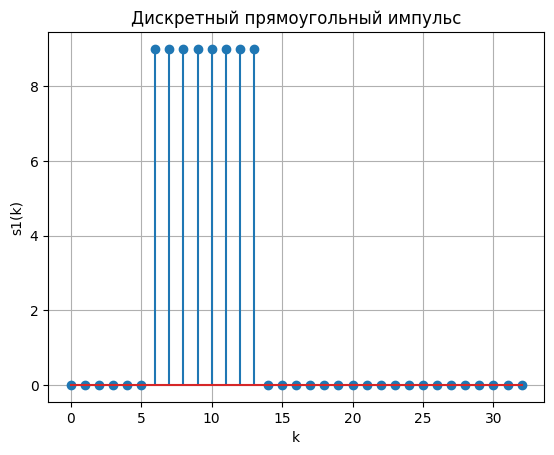

In [32]:
def get_sigma_d(interval, m=0):
    sigma_d = np.zeros(len(interval))
    sigma_d[m:] = 1
    return sigma_d

def generate_rectangular_pulse(U, n_0, n_imp, N):
    k = np.arange(N)

    sigma_d1 = get_sigma_d(k, n_0)
    sigma_d2 = get_sigma_d(k, n_0 + n_imp)
    s1_values = U * (sigma_d1 - sigma_d2)

    return k, s1_values


k, s1_values = generate_rectangular_pulse(U, n_0, n_imp, N)

plt.stem(k, s1_values)
plt.xlabel('k')
plt.ylabel('s1(k)')
plt.title('Дискретный прямоугольный импульс')
plt.grid(True)
plt.show()

### Задание 2.
Смоделировать линейную комбинацию дискретных гармонических сигналов $ s_2(k) $ : $$ s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k), $$
где $$ x_i(k) = B_i \sin ( \hat{w_i} k ), \quad i = 1, 2, 3, ... $$
с выводом графиков последовательностей $ x_i(k) $ и $ s_2(k) $ на интервале времени $ n \in [0, 5N - 1] $. Вычислить среднее значение (идентификатор mean_s2), энергия (идентификатор E) и среднюю мощность последовательности $ s_2(k) $ (идентификатор P). 

Пояснить:

a. операции при моделировании линейной комбинации сигналов $ s_2(k) $;

b. как определяют указанные характеристики.

**Пункт** **а**  
  
При моделировании линейной комбинации сигналов $ s_2(k) $ сначала вычисляются $ x_i(k) $ по форуле $$ x_i(k) = B_i \sin ( \hat{w_i} k ), \quad i = 1, 2, 3, ... $$

$ s_2(k) $ вычисляется путем умножения $ x_i(k) $ на коэффициенты линейной комбинации гармонических сигналов $ a_i $, которые заданы в условии варианта, в нашем случае это соответственно: 
$$ a_1 = -1.5 \\  a_2 = 3.7 \\  a_3 = 4.4 $$

**Пункт** **b**  
  
Указанные характеристики: среднее значение (идентификатор mean_s2), энергия (идентификатор E) и средняя мощность последовательности $ s_2(k) $ (идентификатор P) вычиcляются следующим образом:
1. Среднее значение (идентификатор mean_s2) вычисляется путем взятия среднего арифметического значения от всех значений s2 на интервале периода.
2. Энергия (идентификатор E) в дискретном случае представляет собой сумму квадратов всех значений s2 на интервале периода:
$$E = \sum_{i=0}^{T} s^2(t)$$
3. Средняя мощность последовательности $ s_2(k) $ (идентификатор P) в дискретном случае представляет среднее арифметическое значение энергии на интервале периода: 
$$P = \frac{1}{T} \sum_{i=0}^{T} s^2(t)$$

Каждый из дискретных гармонических сигналов имеет свой период (так как у них разные частоты). Тогда период для линейной комбинации дискретных гармонических сигналов вычисляется как наименьшее общее кратное (НОК) периодов отдельных сигналов. 

Периоды каждого гармонического сигнала: $ T_i = \frac{2 \cdot \pi}{w_i} $

Период линейной комбинации этих сигналов: $ T = НОК(НОК(T_1, T_2), T_3) $

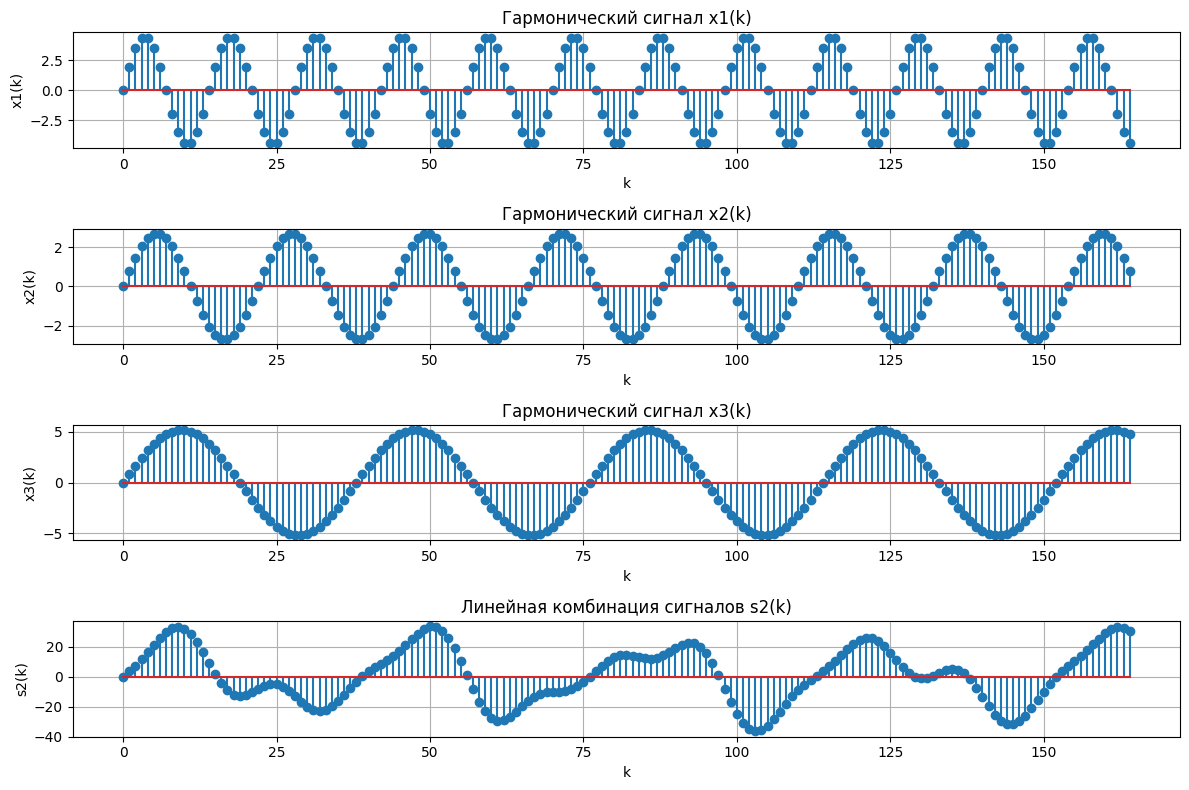

In [33]:
k = np.arange(5 * N) 

x1 = B_1 * np.sin(omega_hat_1 * k)
x2 = B_2 * np.sin(omega_hat_2 * k)
x3 = B_3 * np.sin(omega_hat_3 * k)

s2 = a1 * x1 + a2 * x2 + a3 * x3

sub_plt1 = sub_plt(
    title='Гармонический сигнал x1(k)',
    x=k,
    y=x1,
    x_label='k',
    y_label='x1(k)',
    pos=[4, 1, 1])

sub_plt2 = sub_plt(
    title='Гармонический сигнал x2(k)',
    x=k,
    y=x2,
    x_label='k',
    y_label='x2(k)',
    pos=[4, 1, 2])

sub_plt3 = sub_plt(
    title='Гармонический сигнал x3(k)',
    x=k,
    y=x3,
    x_label='k',
    y_label='x3(k)',
    pos=[4, 1, 3])


sub_plt4 = sub_plt(
    title='Линейная комбинация сигналов s2(k)',
    x=k,
    y=s2,
    x_label='k',
    y_label='s2(k)',
    pos=[4, 1, 4])


graphic([sub_plt1, sub_plt2, sub_plt3, sub_plt4], (12, 8))

In [34]:
T_1 = 2 * np.pi / omega_hat_1
T_2 = 2 * np.pi / omega_hat_2
T_3 = 2 * np.pi / omega_hat_3
print(f"T1 = {T_1}, T2 = {T_2}, T3 = {T_3}")

get_lcm = lambda x,y: int(np.abs(x * y) / math.gcd(int(x), int(y)))
T = get_lcm(get_lcm(T_1, T_2), T_3)
print(f"T = {T}")

T_interval = np.arange(T)
x1_on_T = B_1 * np.sin(omega_hat_1 * T_interval)
x2_on_T = B_2 * np.sin(omega_hat_2 * T_interval)
x3_on_T = B_3 * np.sin(omega_hat_3 * T_interval)

s2_on_T = a1 * x1_on_T + a2 * x2_on_T + a3 * x3_on_T

mean_s2 = np.mean(s2_on_T)
E = np.sum(s2_on_T**2)
P = E / len(s2_on_T)
print(f'Среднее значение (mean_s2): {mean_s2}')
print(f'Энергия (E): {E}')
print(f'Средняя мощность (P): {P}')

T1 = 14.0, T2 = 22.0, T3 = 38.0
T = 2926
Среднее значение (mean_s2): 1.5055929465866785e-15
Энергия (E): 978537.7910000004
Средняя мощность (P): 334.42850000000016


### Задание 3.
Вывести график дискретного сигнала $ s_3(k) $ представляющего собой дискретный гармонический сигнал s(k): $$ s(k) = C \cos( \hat{w_0} k ) $$
с экспоненциальной огибающей $ |a|^k $ на интервале времени $ n \in [0, N-1] $. Привести аналитическую формулу дискретного сигнала $ s_3(k) $ и пояснить операции при его моделировании.

**Аналитическая** **формула** **дискретного** **сигнала** $ s_3(k) $ :
Дискретный гармонический сигнал с экспоненциальной огибающей $ |a|^k $: $$ s(k) = C \cos( \hat{w_0} k ) \cdot |a|^k $$ 

В ходе моделирования $ s_3(k) $ высчитывается по формуле выше в строке кода:
`s3 = C * np.cos(omega_hat_0 * k) * np.abs(a)**k`

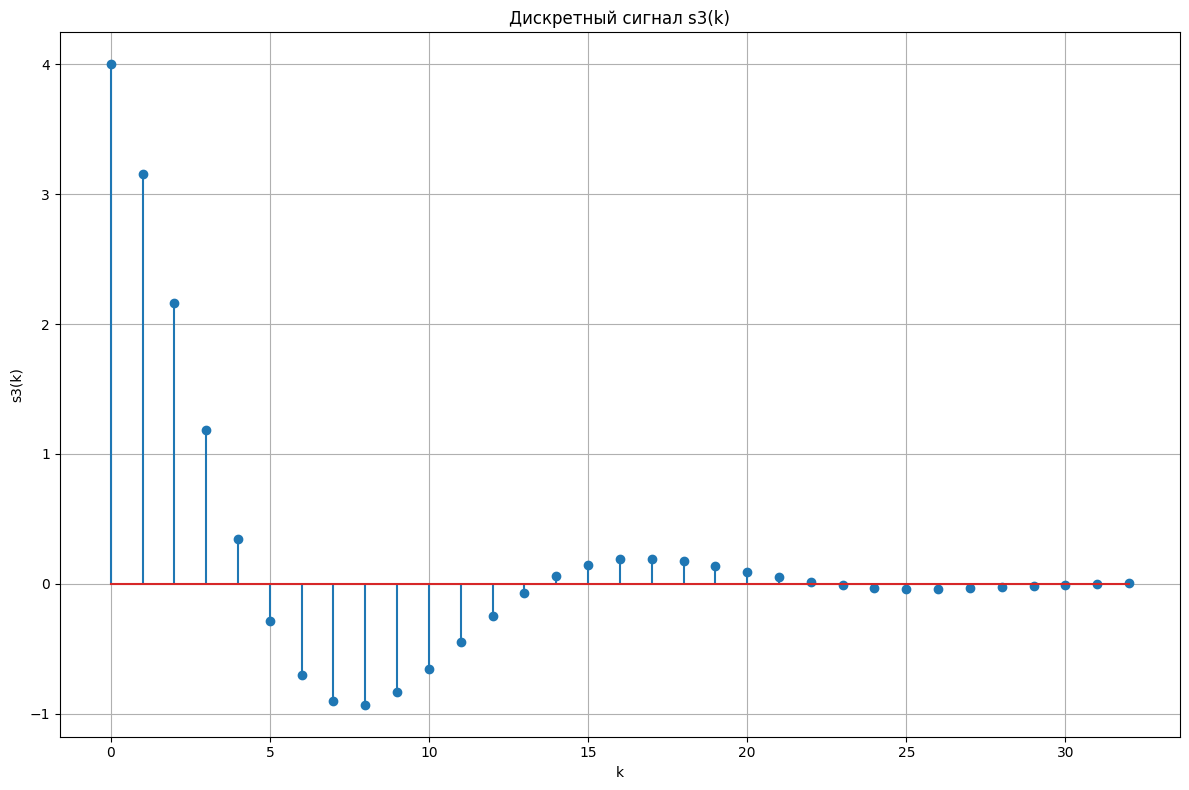

In [35]:
k = np.arange(N)

s3 = C * np.cos(omega_hat_0 * k) * np.abs(a)**k

sub_plt1 = sub_plt(
    title='Дискретный сигнал s3(k)',
    x=k,
    y=s3,
    x_label='k',
    y_label='s3(k)',
    pos=[1, 1, 1])

graphic([sub_plt1], (12, 8))

### Задание 4.
Вывести график пяти периодов периодической последовательности $ s_4(k) $ дискретных прямоугольных импульсов амплитуды U и длительности $ n_{imp} $ с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.

**Пояснение** **моделирования**  

В ходе моделирования периодической последовательности $ s_4(k) $ дискретных прямоугольных импульсов амплитуды U и длительности $ n_{imp} $ с периодом, вдвое большим длительности импульса был взят период `T` равный двум длительности импульса. Чтобы смоделировать 5 периодов, был взят отрезок времени в размере пяти периодов на котором, аналогично заданию 1, был вызван дискретный прямоугольный импульс амплитуды U 5 раз.

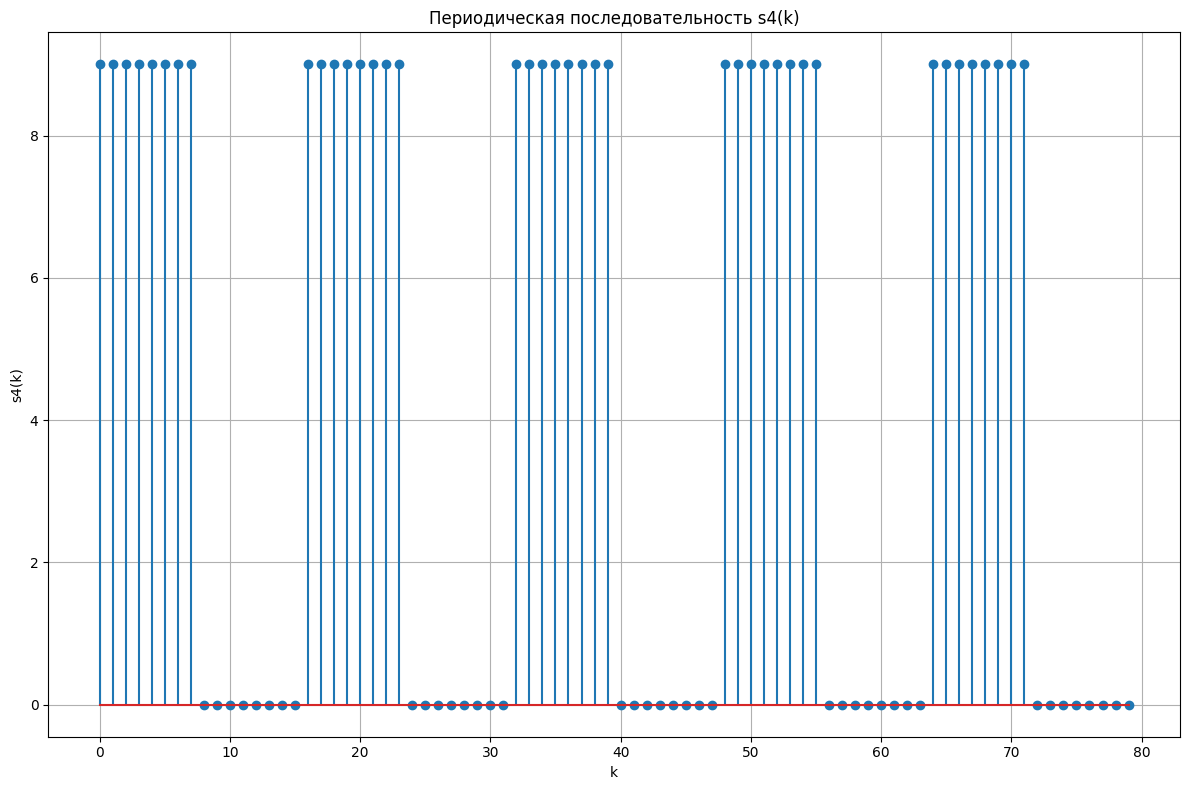

In [36]:
T = 2 * n_imp  

N_5 = 5 * T  

k = np.arange(N_5)
s4 = np.zeros(N_5)

for i in range(5):
    start = i * T
    end = start + n_imp
    s4[start:end] = U


sub_plt1 = sub_plt(
    title='Периодическая последовательность s4(k)',
    x=k,
    y=s4,
    x_label='k',
    y_label='s4(k)',
    pos=[1, 1, 1])

graphic([sub_plt1], (12, 8))


## Выводы
В ходе выполнения лабораторной работы изучены линейные комбинации дискретных сигналов. Получены практические навыки моделирования сигналов с помощью программных средств. Рассмотренные сигналы: дискретный прямоугольный импульс, дискретный гармонический сигнал с экспоненциальной огибающей, а также их характеристики: энергия, среднее значение, средняя мощность сигнала.
Полученные результаты подкреплены соответствующими графиками и выводами.